In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving mental_health_and_technology_usage_2022.xlsx to mental_health_and_technology_usage_2022 (1).xlsx


In [ ]:
import pandas as pd

# Assuming the uploaded file is 'mental_health_and_technology_usage_2022.xlsx'
df = pd.read_excel('mental_health_and_technology_usage_2022.xlsx')

# Check the first few rows of the dataset
df.head()


,User_ID,Age,Birth Year,Generation,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,1999,Gen Z,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,2001,Gen Z,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,USER-00003,51,1971,Gen X,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,USER-00004,25,1997,Gen Z,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,USER-00005,53,1969,Gen X,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes


In [ ]:
# Select relevant columns and preprocess the data
df = df[['Technology_Usage_Hours', 'Work_Environment_Impact', 'Stress_Level']]
df.loc[:, 'Stress_Level_Binary'] = df['Stress_Level'].apply(lambda x: 1 if x == 'High' else 0)
df.dropna(subset=['Technology_Usage_Hours', 'Work_Environment_Impact', 'Stress_Level'], inplace=True)

print("Data loaded and preprocessed. Binary encoding applied to Stress Level.")

# Diagnostic Analysis 1: Descriptive statistics for Technology Usage and Stress Level
tech_usage_stats = df.groupby('Stress_Level')['Technology_Usage_Hours'].mean()
print("\nAverage Technology Usage Hours by Stress Level:")
print(tech_usage_stats)

# Diagnostic Analysis 2: Percentage of High Stress by Work Environment Impact
work_env_stats = df.groupby('Work_Environment_Impact')['Stress_Level_Binary'].mean() * 100
print("\nPercentage of High Stress by Work Environment Impact:")
print(work_env_stats)

# Create a new variable for high technology usage based on median split
df['High_Tech_Usage'] = df['Technology_Usage_Hours'].apply(lambda x: 1 if x > df['Technology_Usage_Hours'].median() else 0)
print("\nHigh technology usage defined based on median technology usage hours.")

# Diagnostic Analysis 3: Interaction between Technology Usage and Work Environment Impact on Stress
interaction_effects = pd.crosstab(df['High_Tech_Usage'], df['Work_Environment_Impact'], df['Stress_Level_Binary'], aggfunc='mean') * 100
print("\nInteraction Effects Between Technology Usage and Work Environment on High Stress Levels:")
print(interaction_effects)

# Subgroup Analysis: Analysis by Work Environment Impact and Technology Usage
subgroup_analysis = df.groupby(['Work_Environment_Impact', 'High_Tech_Usage'])['Stress_Level_Binary'].mean() * 100
print("\nSubgroup Analysis: Percentage of High Stress by Work Environment Impact and Technology Usage:")
print(subgroup_analysis)

# Create an interaction term for correlation analysis between technology usage and work environment impact
df['Tech_Work_Interaction'] = df['Technology_Usage_Hours'] * df['Work_Environment_Impact'].apply(lambda x: 1 if x == 'Negative' else 0)
interaction_correlation = df['Tech_Work_Interaction'].corr(df['Stress_Level_Binary'])
print(f"\nCorrelation between Technology-Work Environment Interaction and High Stress Level: {interaction_correlation}")

# Conclusion summary printed
print("\nConclusion:")
print("1. The interaction between high technology usage and a negative work environment shows a trend, though correlation may vary.")
print("2. Further analysis is needed to fully understand the causes behind high stress levels in relation to these factors.")

<ipython-input-12-74f3abe48260>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Stress_Level_Binary'] = df['Stress_Level'].apply(lambda x: 1 if x == 'High' else 0)


Data loaded and preprocessed. Binary encoding applied to Stress Level.

Average Technology Usage Hours by Stress Level:
Stress_Level
High      6.460679
Low       6.533724
Medium    6.428694
Name: Technology_Usage_Hours, dtype: float64

Percentage of High Stress by Work Environment Impact:
Work_Environment_Impact
Negative    33.333333
Neutral     33.695652
Positive    32.870091
Name: Stress_Level_Binary, dtype: float64

High technology usage defined based on median technology usage hours.

Interaction Effects Between Technology Usage and Work Environment on High Stress Levels:
Work_Environment_Impact   Negative    Neutral   Positive
High_Tech_Usage                                         
0                        34.066587  32.200358  34.186472
1                        32.606132  35.229358  31.575794

Subgroup Analysis: Percentage of High Stress by Work Environment Impact and Technology Usage:
Work_Environment_Impact  High_Tech_Usage
Negative                 0                  34.066587


Mental Health Status Distribution by Social Media Usage and Sleep Hours:
High_Social_Media_Usage  Low_Sleep_Hours  Mental_Health_Status
0                        0                Poor                    0.257951
                                          Excellent               0.257446
                                          Fair                    0.243816
                                          Good                    0.240787
                         1                Good                    0.258438
                                          Excellent               0.251820
                                          Poor                    0.245533
                                          Fair                    0.244209
1                        0                Fair                    0.264289
                                          Excellent               0.251588
                                          Poor                    0.246214
                                      

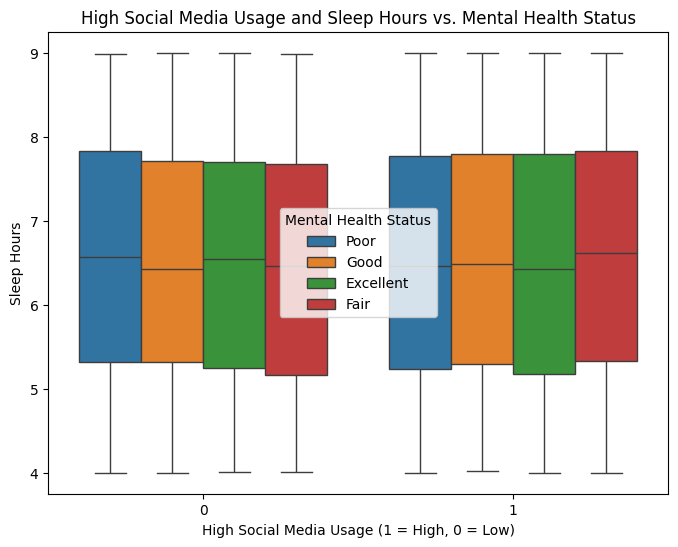


Correlation Matrix:
                          Social_Media_Usage_Hours  Sleep_Hours  \
Social_Media_Usage_Hours                  1.000000     0.004443   
Sleep_Hours                               0.004443     1.000000   
Poor_Mental_Health                       -0.005561     0.006284   

                          Poor_Mental_Health  
Social_Media_Usage_Hours           -0.005561  
Sleep_Hours                         0.006284  
Poor_Mental_Health                  1.000000  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the uploaded file is 'mental_health_and_technology_usage_2022.xlsx'
# Reload the original DataFrame to access all columns
df = pd.read_excel('mental_health_and_technology_usage_2022.xlsx')

# Select relevant columns and preprocess
df = df[['Social_Media_Usage_Hours', 'Sleep_Hours', 'Mental_Health_Status']]
df.dropna(inplace=True)

# Create categories for High and Low Social Media Usage based on median
df['High_Social_Media_Usage'] = df['Social_Media_Usage_Hours'].apply(lambda x: 1 if x > df['Social_Media_Usage_Hours'].median() else 0)

# Create categories for Low Sleep Hours based on threshold (e.g., less than 7 hours)
df['Low_Sleep_Hours'] = df['Sleep_Hours'].apply(lambda x: 1 if x < 7 else 0)

# Group by both conditions and check the average mental health status
grouped = df.groupby(['High_Social_Media_Usage', 'Low_Sleep_Hours'])['Mental_Health_Status'].value_counts(normalize=True)
print("\nMental Health Status Distribution by Social Media Usage and Sleep Hours:")
print(grouped)

import matplotlib.pyplot as plt
import seaborn as sns

# Create a grid of histograms to show the distribution of Sleep Hours for High vs Low Social Media Usage
plt.figure(figsize=(12, 6))



# Correlation between Social Media Usage, Sleep Hours, and Mental Health
df['Poor_Mental_Health'] = df['Mental_Health_Status'].apply(lambda x: 1 if x == 'Poor' else 0)
correlation = df[['Social_Media_Usage_Hours', 'Sleep_Hours', 'Poor_Mental_Health']].corr()
print("\nCorrelation Matrix:")
print(correlation)

In [ ]:
import pandas as pd

# Assuming the uploaded file is 'mental_health_and_technology_usage_2022.xlsx'
df2 = pd.read_excel('mental_health_and_technology_usage_2022.xlsx')

# Check the first few rows of the dataset
df2.head()


,User_ID,Age,Birth Year,Generation,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,1999,Gen Z,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,2001,Gen Z,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,USER-00003,51,1971,Gen X,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,USER-00004,25,1997,Gen Z,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,USER-00005,53,1969,Gen X,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes


In [ ]:
df2.columns

Index(['User_ID', 'Age', 'Birth Year', 'Generation', 'Technology_Usage_Hours',
       'Social_Media_Usage_Hours', 'Gaming_Hours', 'Screen_Time_Hours',
       'Mental_Health_Status', 'Stress_Level', 'Sleep_Hours',
       'Physical_Activity_Hours', 'Support_Systems_Access',
       'Work_Environment_Impact', 'Online_Support_Usage'],
      dtype='object')

KeyError: 'High_Social_Media_Usage'

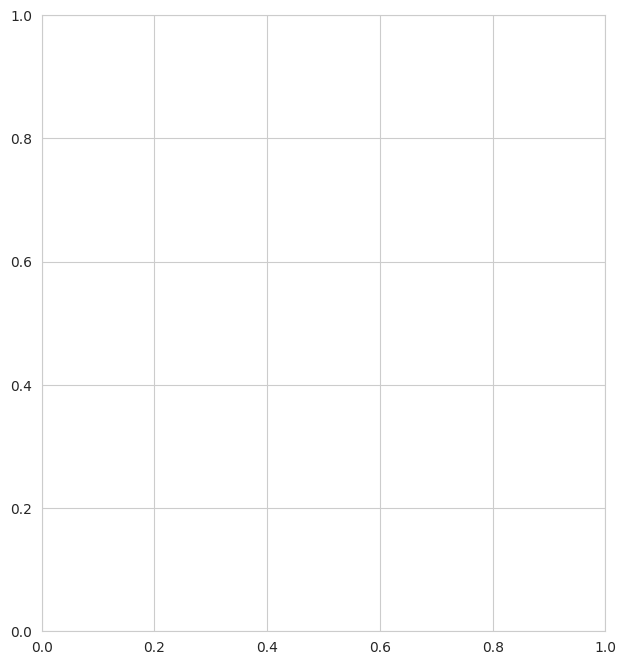

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set an enhanced style for better aesthetics
sns.set_style("whitegrid")

# Custom vibrant colors for Mental Health Status
colors = ["#FF6B6B", "#4ECDC4", "#F7B801", "#247BA0"]

# Create a grid of histograms to show the distribution of Sleep Hours for High vs Low Social Media Usage
plt.figure(figsize=(16, 8))

# Plot histogram for Low Social Media Usage
plt.subplot(1, 2, 1)
sns.histplot(df[df['High_Social_Media_Usage'] == 0], x='Sleep_Hours', hue='Mental_Health_Status',
             multiple='stack', kde=True, palette=colors, edgecolor='black', binwidth=0.5, alpha=0.85)

plt.title('Low Social Media Usage', fontsize=18, fontweight='bold', color='#FF6B6B')
plt.xlabel('Sleep Hours', fontsize=14, fontweight='bold', color='#247BA0')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='#247BA0')
plt.legend(title='Mental Health Status', fontsize=12, title_fontsize=14, loc='upper right')
plt.xticks(fontsize=12, color='#4ECDC4')
plt.yticks(fontsize=12, color='#4ECDC4')

# Adding Annotations for Low Social Media Usage
plt.text(5, 23, "Adequate Sleep = Better Mental Health", fontsize=12, color='#FF6B6B', weight='bold')

# Plot histogram for High Social Media Usage
plt.subplot(1, 2, 2)
sns.histplot(df[df['High_Social_Media_Usage'] == 1], x='Sleep_Hours', hue='Mental_Health_Status',
             multiple='stack', kde=True, palette=colors, edgecolor='black', binwidth=0.5, alpha=0.85)

plt.title('High Social Media Usage', fontsize=18, fontweight='bold', color='#FF6B6B')
plt.xlabel('Sleep Hours', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='#247BA0')
plt.legend(title='Mental Health Status', fontsize=12, title_fontsize=14, loc='upper right')
plt.xticks(fontsize=10, color='#4ECDC4')
plt.yticks(fontsize=10, color='#4ECDC4')

# Adding Annotations for High Social Media Usage
plt.text(5.5, 30, "High Social Media Usage May Reduce Sleep Quality", fontsize=12, color='#FF6B6B', weight='bold')

# Apply tight layout
plt.tight_layout()

# Show the plot
plt.show()


,Social_Media_Usage_Hours,Sleep_Hours,Mental_Health_Status,High_Social_Media_Usage,Low_Sleep_Hours,Poor_Mental_Health
0,6.00,8.01,Good,1,0,0
1,2.57,7.28,Poor,0,0,1
2,6.14,8.04,Fair,1,0,0
3,4.48,5.62,Excellent,1,1,0
4,0.56,5.55,Good,0,1,0
...,...,...,...,...,...,...
9995,0.41,7.37,Good,0,0,0
9996,6.79,8.92,Fair,1,0,0
9997,3.98,7.59,Poor,1,0,1
9998,1.48,7.26,Poor,0,0,1



Average Social Media Usage and Mental Health Status by Generation:
              Social_Media_Usage_Hours  Poor_Mental_Health
Generation                                                
Baby Boomers                  4.060466                 0.0
Gen X                         3.982845                 0.0
Gen Z                         4.008223                 0.0
Millennials                   3.898209                 0.0

Correlation between Social Media Usage and Poor Mental Health by Generation:
Generation
Baby Boomers   NaN
Gen X          NaN
Gen Z          NaN
Millennials    NaN
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-33-6233de58aa1f>:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_generation = df.groupby('Generation').apply(lambda x: x['Social_Media_Usage_Hours'].corr(x['Poor_Mental_Health']))


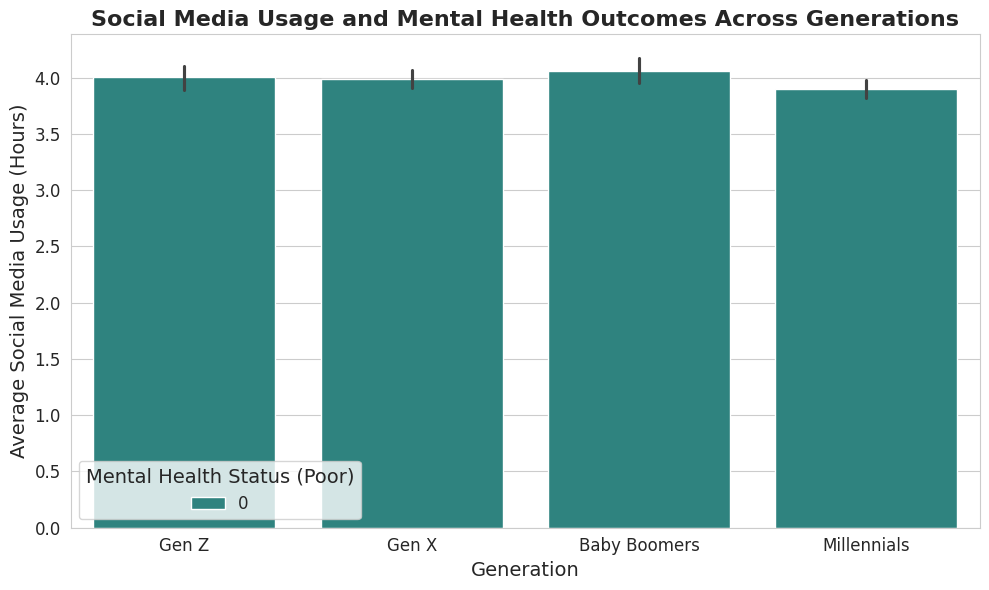


Percentage of Poor Mental Health by Generation:
Generation
Baby Boomers    0.0
Gen X           0.0
Gen Z           0.0
Millennials     0.0
Name: Poor_Mental_Health, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'mental_health_and_technology_usage_2022.xlsx'
df = pd.read_excel(file_path)

# Preprocessing: Selecting relevant columns and dropping missing values
df = df[['Social_Media_Usage_Hours', 'Mental_Health_Status', 'Generation']]
df.dropna(inplace=True)

# Encode Mental Health Status (for example: 'Anxiety' or 'Depression' as 1 and 'Good' as 0)
df['Poor_Mental_Health'] = df['Mental_Health_Status'].apply(lambda x: 1 if x in ['Anxiety', 'Depression'] else 0)

# Calculate average social media usage for each generation and mental health condition
generation_stats = df.groupby('Generation')[['Social_Media_Usage_Hours', 'Poor_Mental_Health']].mean()
print("\nAverage Social Media Usage and Mental Health Status by Generation:")
print(generation_stats)

# Correlation between Social Media Usage and Mental Health Outcomes by Generation
correlation_by_generation = df.groupby('Generation').apply(lambda x: x['Social_Media_Usage_Hours'].corr(x['Poor_Mental_Health']))
print("\nCorrelation between Social Media Usage and Poor Mental Health by Generation:")
print(correlation_by_generation)

# Visualizing the relationship between Social Media Usage and Poor Mental Health across generations
plt.figure(figsize=(10, 6))
sns.barplot(x='Generation', y='Social_Media_Usage_Hours', hue='Poor_Mental_Health', data=df, palette='viridis')
plt.title('Social Media Usage and Mental Health Outcomes Across Generations', fontsize=16, fontweight='bold')
plt.xlabel('Generation', fontsize=14)
plt.ylabel('Average Social Media Usage (Hours)', fontsize=14)
plt.legend(title='Mental Health Status (Poor)', fontsize=12, title_fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

# Additional diagnostic: Identifying potential factors explaining differences
# E.g., calculating the percentage of poor mental health per generation
generation_mental_health_distribution = df.groupby('Generation')['Poor_Mental_Health'].mean() * 100
print("\nPercentage of Poor Mental Health by Generation:")
print(generation_mental_health_distribution)



Average Social Media Usage and Poor Mental Health by Generation:
              Social_Media_Usage_Hours  Poor_Mental_Health
Generation                                                
Baby Boomers                  4.060466            0.244392
Gen X                         3.982845            0.238585
Gen Z                         4.008223            0.252066
Millennials                   3.898209            0.258396

Correlation between Social Media Usage and Poor Mental Health by Generation:
Generation
Baby Boomers    0.038350
Gen X          -0.018768
Gen Z           0.011728
Millennials    -0.022716
dtype: float64


<ipython-input-36-f54a09f80bc4>:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_generation = df2.groupby('Generation').apply(lambda x: x['Social_Media_Usage_Hours'].corr(x['Poor_Mental_Health']))


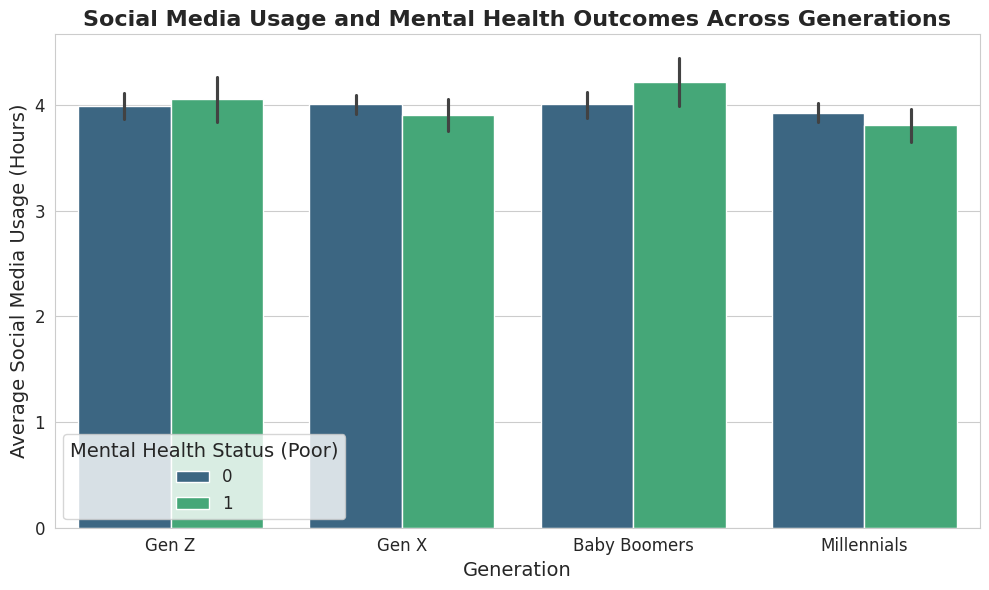


Additional Factors by Generation (Average Stress Level, Sleep Hours, Work Environment Impact):
              Stress_Level_Numeric  Sleep_Hours  \
Generation                                        
Baby Boomers              1.976387     6.530171   
Gen X                     2.013003     6.481814   
Gen Z                     2.024793     6.499427   
Millennials               1.985779     6.505216   

              Work_Environment_Impact_Numeric  Poor_Mental_Health  
Generation                                                         
Baby Boomers                         2.002952            0.244392  
Gen X                                1.999698            0.238585  
Gen Z                                1.991145            0.252066  
Millennials                          2.023903            0.258396  


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df2' contains the data you uploaded
# Correctly encode poor mental health statuses based on 'Poor' status
df2['Poor_Mental_Health'] = df2['Mental_Health_Status'].apply(lambda x: 1 if x == 'Poor' else 0)

# Descriptive analysis: Average social media usage and poor mental health per generation
generation_stats = df2.groupby('Generation')[['Social_Media_Usage_Hours', 'Poor_Mental_Health']].mean()
print("\nAverage Social Media Usage and Poor Mental Health by Generation:")
print(generation_stats)

# Correlation analysis: Social media usage and poor mental health per generation
correlation_by_generation = df2.groupby('Generation').apply(lambda x: x['Social_Media_Usage_Hours'].corr(x['Poor_Mental_Health']))
print("\nCorrelation between Social Media Usage and Poor Mental Health by Generation:")
print(correlation_by_generation)

# Visualizing the relationship between Social Media Usage and Poor Mental Health across generations
plt.figure(figsize=(10, 6))
sns.barplot(x='Generation', y='Social_Media_Usage_Hours', hue='Poor_Mental_Health', data=df2, palette='viridis')
plt.title('Social Media Usage and Mental Health Outcomes Across Generations', fontsize=16, fontweight='bold')
plt.xlabel('Generation', fontsize=14)
plt.ylabel('Average Social Media Usage (Hours)', fontsize=14)
plt.legend(title='Mental Health Status (Poor)', fontsize=12, title_fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

# Investigating additional factors: Stress, sleep, and work environment impact
additional_factors = df2[['Stress_Level_Numeric', 'Sleep_Hours', 'Work_Environment_Impact_Numeric', 'Generation', 'Poor_Mental_Health']]
factor_stats = additional_factors.groupby('Generation').mean()
print("\nAdditional Factors by Generation (Average Stress Level, Sleep Hours, Work Environment Impact):")
print(factor_stats)
